In [1]:
%load_ext autoreload
%autoreload 2
import logging

logging.getLogger('mat73').setLevel(logging.CRITICAL)
import os
import re
from scipy.io import loadmat
import mat73
logging.getLogger('mat73').setLevel(logging.CRITICAL)

import warnings

from collections import Counter
import pandas as pd
import numpy as np
import mne
from scipy.stats import f_oneway, ttest_ind




import seaborn as sns
import matplotlib.pyplot as plt
# import holoviews as hv
import matplotlib
from brokenaxes import brokenaxes
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from utils import *
from connectivity_dynamics import *

from pandarallel import pandarallel
pandarallel.initialize()


INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
tst = pd.read_csv('../data/connectivity/peri_ictal_flow_verbose_centered_Spat53.csv')

In [3]:
tst

,Unnamed: 0,win_label,win_sz_st_end,sz_end,win_sz_centered,source,target,src_bip,value,in_conn,out_conn,net_conn,period,window_designations,freq_band,eventID,patID,sz_type
0,0,interictal,-595,118,-595,soz,soz,TPE1TPE2,NaN,0.204661,-0.000429,0.205090,0,0.0_0.0_0.0,delta,1,Spat53,FBTC
1,1,interictal,-595,118,-595,soz,nz,TPE1TPE2,-0.000429,0.204661,-0.000429,0.205090,0,0.0_0.0_0.0,delta,1,Spat53,FBTC
2,2,interictal,-595,118,-595,nz,soz,PT1PT2,-0.129024,0.046066,0.000860,0.045206,0,0.0_0.0_0.0,delta,1,Spat53,FBTC
3,3,interictal,-595,118,-595,nz,soz,PT2PT3,-0.895203,0.149780,0.020962,0.128819,0,0.0_0.0_0.0,delta,1,Spat53,FBTC
4,4,interictal,-595,118,-595,nz,soz,PT3PT4,0.872065,0.093455,0.232681,-0.139226,0,0.0_0.0_0.0,delta,1,Spat53,FBTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685655,2685655,post-ictal,623,135,729,nz,nz,TPE3TPE4,0.217227,0.181440,0.219713,-0.038273,1324,2.0_2.0_2.0,gamma_H,2,Spat53,FBTC
2685656,2685656,post-ictal,623,135,729,nz,nz,TPE4TPE5,-0.014805,0.192153,-0.014479,0.206632,1324,2.0_2.0_2.0,gamma_H,2,Spat53,FBTC
2685657,2685657,post-ictal,623,135,729,nz,nz,TPE5TPE6,0.088896,1.185141,0.086257,1.098885,1324,2.0_2.0_2.0,gamma_H,2,Spat53,FBTC
2685658,2685658,post-ictal,623,135,729,nz,nz,TPE6TPE7,0.354581,1.435948,0.334753,1.101195,1324,2.0_2.0_2.0,gamma_H,2,Spat53,FBTC


## Agg Peri-Ictal Connectivity

In [4]:
DATA_DIR = "/mnt/ernie_main/Ghassan/ephys/data/periconnectivity"
color_map = COLOR_MAP
peri_fs = glob.glob(os.path.join(DATA_DIR, "peri_ictal_network_*pat*.csv"))
peri_fs

['/mnt/ernie_main/Ghassan/ephys/data/periconnectivity/peri_ictal_network_Epat02.csv',
 '/mnt/ernie_main/Ghassan/ephys/data/periconnectivity/peri_ictal_network_Epat04.csv',
 '/mnt/ernie_main/Ghassan/ephys/data/periconnectivity/peri_ictal_network_Epat06.csv',
 '/mnt/ernie_main/Ghassan/ephys/data/periconnectivity/peri_ictal_network_Epat09.csv',
 '/mnt/ernie_main/Ghassan/ephys/data/periconnectivity/peri_ictal_network_Epat10.csv',
 '/mnt/ernie_main/Ghassan/ephys/data/periconnectivity/peri_ictal_network_Epat14.csv',
 '/mnt/ernie_main/Ghassan/ephys/data/periconnectivity/peri_ictal_network_Epat15.csv',
 '/mnt/ernie_main/Ghassan/ephys/data/periconnectivity/peri_ictal_network_Epat18.csv',
 '/mnt/ernie_main/Ghassan/ephys/data/periconnectivity/peri_ictal_network_Epat19.csv',
 '/mnt/ernie_main/Ghassan/ephys/data/periconnectivity/peri_ictal_network_Epat21.csv',
 '/mnt/ernie_main/Ghassan/ephys/data/periconnectivity/peri_ictal_network_Epat23.csv',
 '/mnt/ernie_main/Ghassan/ephys/data/periconnectivity/

In [4]:
verbose_f =  '/mnt/ernie_main/Ghassan/ephys/data/periconnectivity/peri_ictal_network_verbose_Epat09.csv'
tst = pd.read_csv(verbose_f)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/ernie_main/Ghassan/ephys/data/periconnectivity/peri_ictal_network_verbose_Epat09.csv'

In [5]:
grp_peri_dfs = []
check_list = []
for f in peri_fs:
    if "Spat18" in f or "Spat17" in f or "Epat20" in f:
        continue
    peri_df = pd.read_csv(f)
    try:
        peri_event_df = center_onset(peri_df)
        grp_peri_dfs.append(peri_event_df)
    except IndexError as e:
        print(f) 
        check_list.append(f)
grp_peri_dfs = pd.concat(grp_peri_dfs)

/tmp/ipykernel_2785800/4080491313.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  peri_df = pd.read_csv(f)
/tmp/ipykernel_2785800/4080491313.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  peri_df = pd.read_csv(f)
/tmp/ipykernel_2785800/4080491313.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  peri_df = pd.read_csv(f)
/tmp/ipykernel_2785800/4080491313.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  peri_df = pd.read_csv(f)
/tmp/ipykernel_2785800/4080491313.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  peri_df = pd.read_csv(f)


In [6]:
def remap_ictal(win_sz_st_end, curr_label):
    """remaps the ictal period into early ictal and late ictal
    currently assumes that we've created a 30s seizure sub sampling 
    schema and that the early ictal will be 0-15
    and the late ictal will be 15-30"""
    if win_sz_st_end <15 and win_sz_st_end > 0:
        return "early_ictal"
    if win_sz_st_end <30 and win_sz_st_end >0:
        return "late_ictal"
    elif curr_label == 'early_post_ictal':
        return "post_ictal"
    return curr_label
grp_peri_dfs["win_2sz_label"] = grp_peri_dfs.apply(lambda row: remap_ictal(row['win_sz_st_end'], row['win_label']), axis =1)

In [7]:
print(f"Successfully loaded {len(set(grp_peri_dfs.patID))} patients records")
check_list

Successfully loaded 75 patients records


[]

In [8]:
grp_peri_dfs.win_2sz_label.unique()

array(['interictal', 'pre_ictal', 'early_ictal', 'late_ictal',
       'post_ictal', 'ictal', None], dtype=object)

In [8]:
tst_df= grp_peri_dfs[grp_peri_dfs.patID == 'Epat02']
tst_df = tst_df[tst_df.eventID == '11']
tst_df = tst_df[tst_df.freq_band == 'delta']
tst_df = tst_df[tst_df.region =='soz']
print(f'Window designations{tst_df.win_label.unique()}')
tst_df = tst_df[tst_df.win_label.isin(['early_ictal',  'ictal','late_ictal' ])]

Window designations['interictal' 'pre_ictal' 'early_ictal' 'ictal' 'late_ictal'
 'early_post_ictal' 'post_ictal']


In [10]:
count_df

,sz_type,eventID,patID
0,FAS,123,123
1,FBTC,82,82
2,FIAS,149,149
3,"Focal, unknown awareness",288,288
4,Unknown,26,26


In [9]:
tmp_df = grp_peri_dfs[grp_peri_dfs.period ==0]
tmp_df  =tmp_df[tmp_df.region == 'soz']
tmp_df = tmp_df[tmp_df.freq_band == 'delta']
count_df = tmp_df[['eventID','patID','sz_type']].groupby(['sz_type']).count().reset_index()
total_sz = count_df.eventID.sum()
with sns.plotting_context("paper"):
    with sns.color_palette("cubehelix"):
        ax = sns.barplot(count_df, x='sz_type', y='eventID', hue="sz_type")
        _ = plt.xticks(rotation=45)
        _ = plt.title(f"Count of Seizure Types for 75 patients, total sz count: {total_sz}")
        plt.xlabel("Seizure count")
        plt.ylabel("Seizure Type")
        plt.savefig("../viz/sz_counts.svg", format='svg', dpi=600, transparent=True)



# Visualizing seizure-centered connectivity dynamics

In [14]:
grp_peri_dfs

,win_label,win_sz_st_end,sz_end,win_sz_centered,period,region,net_pdc,in_pdc,out_pdc,freq_band,window_designations,eventID,patID,sz_type
109116,interictal,-595.0,122,-595,0,soz,0.021986,0.087908,0.065922,delta,0.0_0.0_0.0,7,Epat02,FBTC
109117,interictal,-595.0,122,-595,0,nz,-0.000656,0.068683,0.069340,delta,0.0_0.0_0.0,7,Epat02,FBTC
109118,interictal,-595.0,122,-595,0,soz,0.014507,0.086870,0.072362,theta,0.0_0.0_0.0,7,Epat02,FBTC
109119,interictal,-595.0,122,-595,0,nz,-0.000433,0.073022,0.073455,theta,0.0_0.0_0.0,7,Epat02,FBTC
109120,interictal,-595.0,122,-595,0,soz,0.005419,0.080483,0.075064,alpha,0.0_0.0_0.0,7,Epat02,FBTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417451,post_ictal,623.0,35,629,1224,pz,0.025972,0.090981,0.065009,gamma_l,2.0_2.0_2.0,39,Spat48,"Focal, unknown awareness"
417452,post_ictal,623.0,35,629,1224,nz,-0.007473,0.062239,0.069711,gamma_l,2.0_2.0_2.0,39,Spat48,"Focal, unknown awareness"
417453,post_ictal,623.0,35,629,1224,soz,0.001524,0.070033,0.068510,gamma_H,2.0_2.0_2.0,39,Spat48,"Focal, unknown awareness"
417454,post_ictal,623.0,35,629,1224,pz,0.026856,0.093721,0.066865,gamma_H,2.0_2.0_2.0,39,Spat48,"Focal, unknown awareness"


In [15]:
#Grouping across seizures on a per-patient level
# For every patient, along each region, in each frequency band, for all windows of time per seizure, group and get average values
tmp_df = grp_peri_dfs.dropna()
peri_stats_df = tmp_df[['region','net_pdc','in_pdc','out_pdc','freq_band','patID','win_sz_st_end']].groupby(['patID','region','freq_band', 'win_sz_st_end',]).mean().reset_index()
peri_stats_df.shape[0]


1520634

In [12]:
peri_stats_df.head(5)

,patID,region,freq_band,win_sz_st_end,net_pdc,in_pdc,out_pdc
0,Epat02,nz,alpha,-595.0,-0.001985,0.072466,0.074450
1,Epat02,nz,alpha,-594.0,-0.002078,0.071453,0.073530
2,Epat02,nz,alpha,-593.0,-0.002462,0.070521,0.072983
3,Epat02,nz,alpha,-592.0,-0.002188,0.071400,0.073589
4,Epat02,nz,alpha,-591.0,-0.001999,0.070762,0.072761


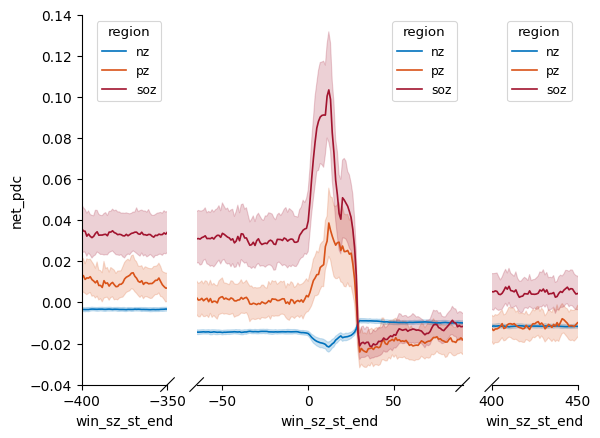

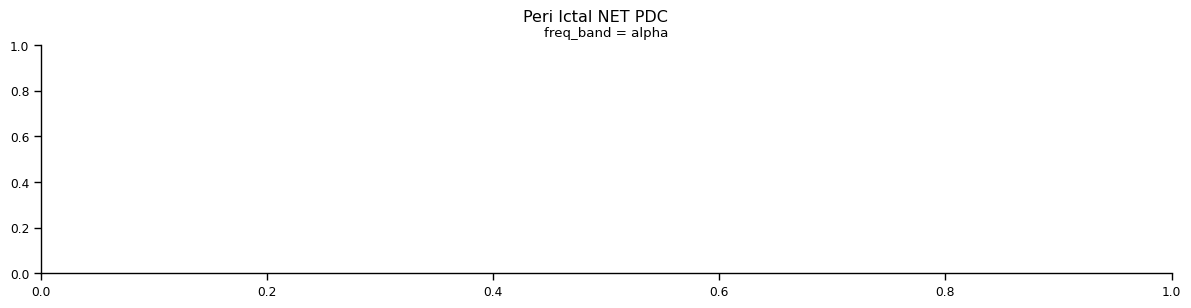

In [16]:
bax = brokenaxes(xlims=((-400,-350), (-65,90),(400,450)))
with sns.plotting_context("paper"):
  #  with sns.color_palette("tab10"):
    sns.set_palette(sns.color_palette(color_map.values()))
    plot_df = peri_stats_df[peri_stats_df.freq_band =='alpha']
    grid = sns.FacetGrid(plot_df, row='freq_band',row_order=['alpha',],aspect=4,palette=color_map) 
   # ax = grid.map_dataframe(sns.lineplot, y='net_pdc',x='win_sz_st_end', hue='region')
    axes = grid.axes
    for ax in bax.axs:
        sns.lineplot(data=plot_df,x='win_sz_st_end',y='net_pdc', hue='region',palette=color_map, ax=ax)
        # ax[0].vlines(x = [-60,0, 30, 90], ymin = -.05, ymax = .12,linestyles ='dashed')
    #plt.xlim(-100, 200)
    bax.axs[0].set_yticks(ax.get_yticks())

    # plt.suplabel("5s Windows (1s Strides)")
    grid.figure.suptitle("Peri Ictal NET PDC",y=1.01)
    plt.savefig("../viz/peri_Epat_FULL_peri_NETpdc_noNORM.pdf", format='pdf', transparent=True)


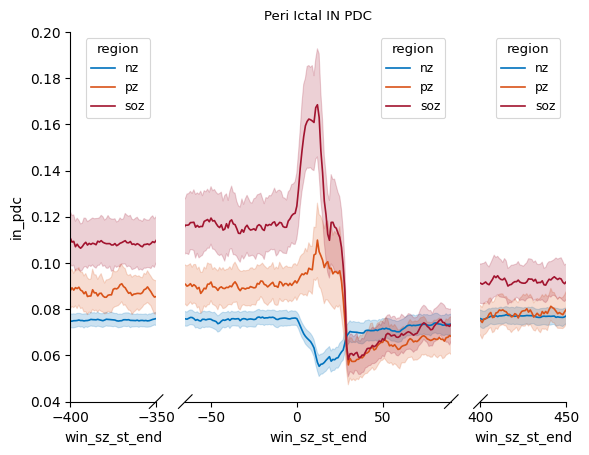

In [17]:
bax = brokenaxes(xlims=((-400,-350), (-65,90),(400,450)))
with sns.plotting_context("paper"):
    plot_df = peri_stats_df[peri_stats_df.freq_band =='alpha']
    for ax in bax.axs:
        sns.lineplot(data=plot_df,x='win_sz_st_end',y='in_pdc', hue='region',palette=color_map, ax=ax)
        # ax[0].vlines(x = [-60,0, 30, 90], ymin = -.05, ymax = .12,linestyles ='dashed')
    #plt.xlim(-100, 200)
    bax.axs[0].set_yticks(ax.get_yticks())
    # plt.suplabel("5s Windows (1s Strides)")
    plt.title("Peri Ictal IN PDC",y=1.01)
    plt.savefig("../viz/peri_Epat_FULL_peri_INpdc_noNORM.pdf",transparent=True)


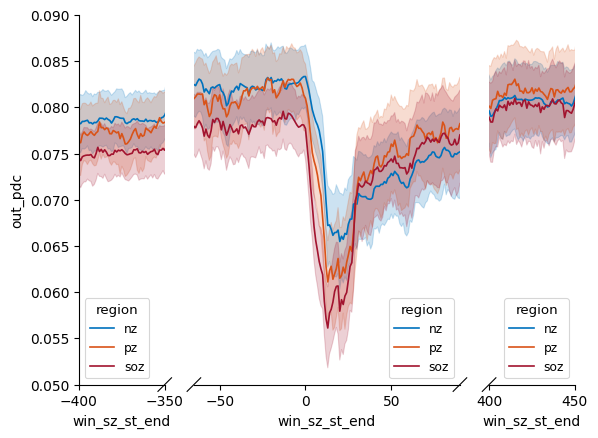

In [18]:
bax = brokenaxes(xlims=((-400,-350), (-65,90),(400,450)))
with sns.plotting_context("paper"):
    plot_df = peri_stats_df[peri_stats_df.freq_band =='alpha']
    for ax in bax.axs:
        sns.lineplot(data=plot_df,x='win_sz_st_end',y='out_pdc', hue='region',palette=color_map, ax=ax)
        # ax[0].vlines(x = [-60,0, 30, 90], ymin = -.05, ymax = .12,linestyles ='dashed')
    #plt.xlim(-100, 200)
    bax.axs[0].set_yticks(ax.get_yticks())
    plt.savefig("../viz/peri_Epat_FULL_peri_OUTpdc_zscore_noNORM.pdf",transparent=True)


TODO:
1. Zoom in on Pre-ictal Period, is anything significantly different during this period?
1. Compress timelines
1. Add significance testing for periods 

## Zooming in On the Pre-ictal Period

In [19]:
tmp_df = grp_peri_dfs[grp_peri_dfs.win_sz_st_end < 30]
tmp_df = tmp_df[tmp_df.win_label.isin(['interictal','pre_ictal','early_ictal', 'early_post_ictal'])].dropna()
peri_stats_df = tmp_df[['region','net_pdc','in_pdc','out_pdc','freq_band','patID','win_sz_st_end']].groupby(['patID','region','freq_band', 'win_sz_st_end']).mean().reset_index()


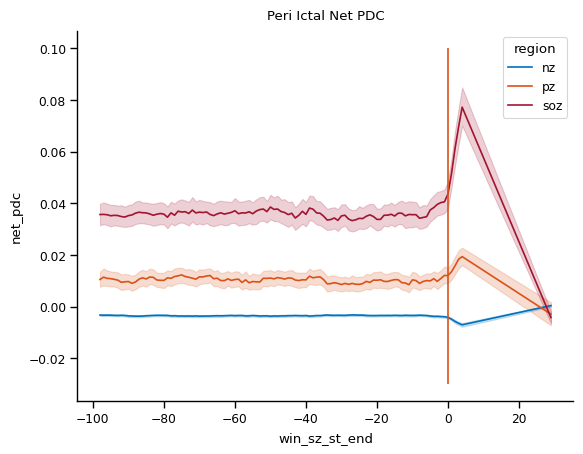

In [20]:
# alpha_peri_df.groupby(['subj','period','region']).mean().reset_index()
with sns.plotting_context("paper"):
        plot_df = peri_stats_df[peri_stats_df.win_sz_st_end >-99]
        # plot_df = plot_df[plot_df.win_sz_st_end>-100]
        ax = sns.lineplot(data=plot_df,y='net_pdc',x='win_sz_st_end', hue='region',  palette=color_map) 
        ax.vlines(x=[0], ymin=-.03,ymax=.1)
        # ax.hlines(y=[.035],xmin=-100, xmax=20)
        # ax.set(ylim=(-3, 20))
        sns.despine()
        plt.title("Peri Ictal Net PDC",y=1.01)
        plt.savefig("../viz/peri_Epat_zoom_preNET_0dc_zscore_noNORM.pdf",transparent=True)
        #plt.xticks(np.linspace(-600,400,3))


In [18]:
# windowsright up to 0_0_1 seem to be changing to gear up for a seizure
#TODO examine this super zoomed in window

In [62]:
#Melting peri_connectivity_df into windows
tmp_df = grp_peri_dfs.dropna()
window_stats_df = tmp_df[['region','net_pdc','in_pdc','out_pdc','freq_band','patID','win_2sz_label']].groupby(['patID','region','freq_band', 'win_2sz_label']).mean().reset_index()
window_stats_df = window_stats_df.melt(id_vars=['patID','region','freq_band','win_2sz_label',], value_vars=['net_pdc','in_pdc','out_pdc'],value_name='strength', var_name='connectivity')
window_stats_df.head()


,patID,region,freq_band,win_2sz_label,connectivity,strength
0,Epat02,nz,alpha,early_ictal,net_pdc,-0.009257
1,Epat02,nz,alpha,interictal,net_pdc,-0.001553
2,Epat02,nz,alpha,late_ictal,net_pdc,-0.000986
3,Epat02,nz,alpha,post_ictal,net_pdc,0.000125
4,Epat02,nz,alpha,pre_ictal,net_pdc,-0.002226


In [66]:
COLOR_MAP

{'pz': '#D95319',
 'soz': '#A2142F',
 'nz': '#0072BD',
 'niz': '#0072BD',
 'pz_soz': '#D95319',
 'soz_soz': '#A2142F',
 'nz_soz': '#0072BD',
 'niz_soz': '#A2142F',
 'niz_pz': '#D95319',
 'niz_niz': '#0072BD',
 'PZ': '#D95319',
 'SOZ': '#A2142F',
 'NZ': '#0072BD',
 'NIZ': '#0072BD',
 'PZ_SOZ': '#D95319',
 'SOZ_SOZ': '#A2142F',
 'NZ_SOZ': '#0072BD',
 'NIZ_SOZ': '#A2142F',
 'NIZ_PZ': '#D95319',
 'NIZ_NIZ': '#0072BD',
 'SOZ_False': '#c28893',
 'SOZ_True': '#A2142F',
 'PZ_False': '#dba38a',
 'PZ_True': '#D95319',
 'NIZ_False': '#84a2b5',
 'NIZ_True': '#0072BD'}

In [21]:
# tmp_df = window_stats_df[window_stats_df.freq_band == 'gamma_H']
# tmp_df[['region','freq_band','connectivity', 'win_label','strength']].groupby(['region','freq_band','connectivity', 'win_label']).mean()

/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#d95319'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#d95319'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#d95319'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ghassan/miniconda3/envs/ephys/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and w

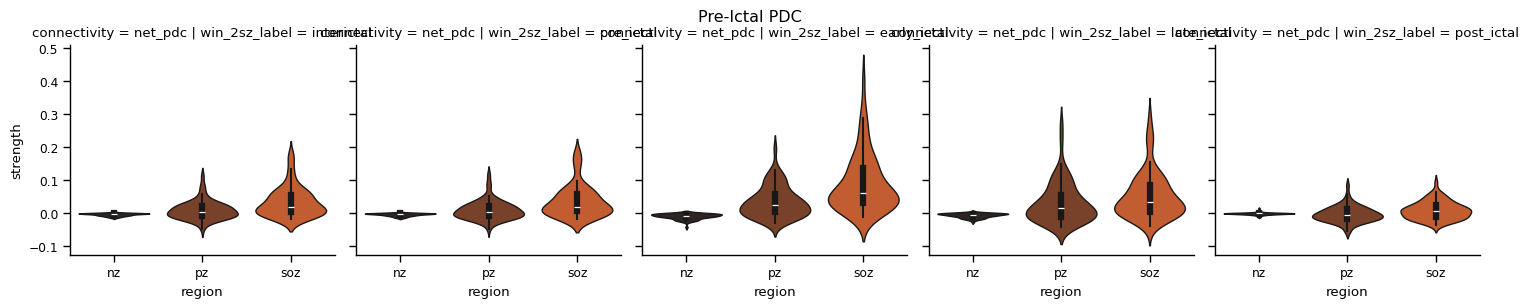

In [67]:
with sns.plotting_context("paper"):
        plot_df = window_stats_df[window_stats_df.freq_band =='alpha']
        ## NOTE: combining windows here to match designations inter, pre, early-ictal, late_ictal, post_ictal
        grid = sns.FacetGrid(plot_df, row='connectivity',row_order=['net_pdc' ],
                             col='win_2sz_label', 
                             col_order=['interictal', 'pre_ictal','early_ictal','late_ictal','post_ictal'],
                             palette=COLOR_MAP) 
        ax = grid.map_dataframe(sns.violinplot, y='strength',x='region', hue='region')
        grid.add_legend()
        grid.figure.suptitle("Pre-Ictal PDC",y=1.01)
        plt.savefig("../viz/peri_alpha_lanterns.pdf", transparent=True)


### Significance Testing
Significance Testing these periods. Want to know if SOZ NIZ and PZ are distinguishable in all 3 periods and also want to know if the connectivity between each period changes significantly.

In [9]:
# Get stats DF
tmp_df = grp_peri_dfs.dropna()
window_stats_df = tmp_df[['region','net_pdc','in_pdc','out_pdc','freq_band','patID','win_2sz_label']].groupby(['patID','region','freq_band', 'win_2sz_label']).mean().reset_index()
window_stats_df = window_stats_df.melt(id_vars=['patID','region','freq_band','win_2sz_label',], value_vars=['net_pdc','in_pdc','out_pdc'],value_name='strength', var_name='connectivity')
window_stats_df.head()

,patID,region,freq_band,win_2sz_label,connectivity,strength
0,Epat02,nz,alpha,early_ictal,net_pdc,-0.009257
1,Epat02,nz,alpha,interictal,net_pdc,-0.001553
2,Epat02,nz,alpha,late_ictal,net_pdc,-0.000986
3,Epat02,nz,alpha,post_ictal,net_pdc,0.000125
4,Epat02,nz,alpha,pre_ictal,net_pdc,-0.002226


In [10]:
# Changes between Periods for Net connectivity
stats_df = window_stats_df[window_stats_df.freq_band =='alpha']
stats_df = stats_df[stats_df.connectivity == 'net_pdc']
windows = list(set(stats_df.win_2sz_label))
n = len(windows)
nz_sig_matrix = np.ones((n,n))
pz_sig_matrix = np.ones((n,n))
soz_sig_matrix = np.ones((n,n))
regional_sig_diff = dict()

for i, win_2sz_label in enumerate(windows):
    for j, comp_win in enumerate(windows):
        if i == j:
            continue
        win_df = stats_df[stats_df.win_2sz_label == win_2sz_label]
        comp_df = stats_df[stats_df.win_2sz_label == comp_win]

        #Get net connectivity for each region during this window
        soz_win, soz_comp = win_df[win_df.region == 'soz'].strength, comp_df[comp_df.region =='soz'].strength
        pz_win, pz_comp = win_df[win_df.region == 'pz'].strength, comp_df[comp_df.region =='pz'].strength
        nz_win, nz_comp = win_df[win_df.region == 'nz'].strength, comp_df[comp_df.region =='nz'].strength

        nz_sig_matrix[i,j] = ttest_ind(nz_win, nz_comp)[1]
        
        soz_sig_matrix[i,j] = ttest_ind(soz_win, soz_comp)[1]
        pz_sig_matrix[i,j] = ttest_ind(pz_win, pz_comp)[1]
    _, p = f_oneway(soz_win, pz_win,nz_win)
    if p <.05: 
        print(f"In window {win_2sz_label} all 3 regions' net connectivity appears to be significantly different\n with p_value:{p}")
        reg_keys, regional_sig_diff[win_2sz_label] = paried_region_significance({'soz':soz_win, 'nz':nz_win, 'pz':pz_win})
        print(reg_keys)

#Setting multiple comparison cut off for significance result
cutoff = .05 / (3*6*6)
#highlighting significant entries in the matrix 
og_sig_matrix= copy.copy(soz_sig_matrix)
print(f"SOZ SIG matrix values:\n {soz_sig_matrix}")
soz_sig_matrix[soz_sig_matrix > cutoff] =1
soz_sig_matrix[soz_sig_matrix <= cutoff] =0
#1 - matrix so that significant entries can show up as bright on heatmap (heatmap is of indicators)
soz_win_df = pd.DataFrame(data=1-soz_sig_matrix,columns=windows, index=windows)


print(f"\n\nNIZ SIG matrix values:\n {nz_sig_matrix}")
nz_sig_matrix[nz_sig_matrix > cutoff] =1
nz_sig_matrix[nz_sig_matrix <= cutoff] =0
nz_win_df = pd.DataFrame(data=1-nz_sig_matrix,columns=windows, index=windows)

print(f"\n\nPZ SIG matrix values:\n {pz_sig_matrix}")

pz_sig_matrix[pz_sig_matrix > cutoff] =1
pz_sig_matrix[pz_sig_matrix <= cutoff] =0
pz_win_df = pd.DataFrame(data=1-pz_sig_matrix,columns=windows, index=windows)


In window late_ictal all 3 regions' net connectivity appears to be significantly different
 with p_value:2.587722676696948e-10
['soz', 'nz', 'pz']
In window interictal all 3 regions' net connectivity appears to be significantly different
 with p_value:5.875190967961903e-12
['soz', 'nz', 'pz']
In window early_ictal all 3 regions' net connectivity appears to be significantly different
 with p_value:2.1118606668041657e-20
['soz', 'nz', 'pz']
In window post_ictal all 3 regions' net connectivity appears to be significantly different
 with p_value:0.0016617693087715472
['soz', 'nz', 'pz']
In window pre_ictal all 3 regions' net connectivity appears to be significantly different
 with p_value:4.830361242765358e-12
['soz', 'nz', 'pz']
SOZ SIG matrix values:
 [[1.00000000e+00 5.71068367e-02 4.47505236e-03 1.03635106e-06
  9.91043842e-02]
 [5.71068367e-02 1.00000000e+00 2.99536075e-06 6.02574031e-05
  7.85065335e-01]
 [4.47505236e-03 2.99536075e-06 1.00000000e+00 2.93497291e-12
  8.94974121e-06]


In [72]:
soz_win_df = pd.DataFrame(data=og_sig_matrix,columns=windows, index=windows)
windows

['interictal',
 'pre_ictal',
 'post_ictal',
 'early_ictal',
 'ictal',
 'late_ictal',
 'early_post_ictal']

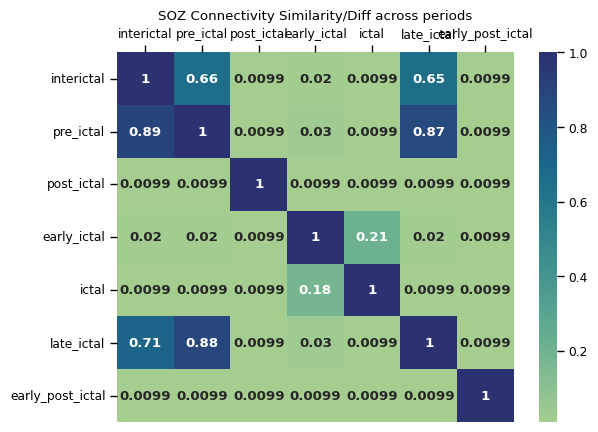

In [77]:
with sns.plotting_context("paper"):
    ax = sns.heatmap(soz_win_df,annot=True,cmap="crest", annot_kws={"weight":"bold"})
    ax.xaxis.tick_top()
    plt.title("SOZ Connectivity Similarity/Diff across periods")
    plt.savefig("../viz/interperiod_soz_self_similarity.pdf",transparent=True)


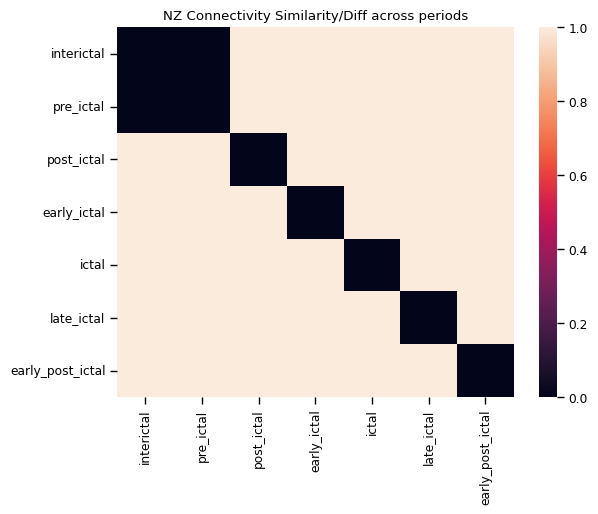

In [47]:
with sns.plotting_context("paper"):
    sns.heatmap(nz_win_df)
    plt.title("NZ Connectivity Similarity/Diff across periods")
    plt.savefig("../viz/interperiod_nz_self_similarity.pdf",transparent=True)
    #Put stars in the boxes that correspond to p-vals
    #remove coloar bar

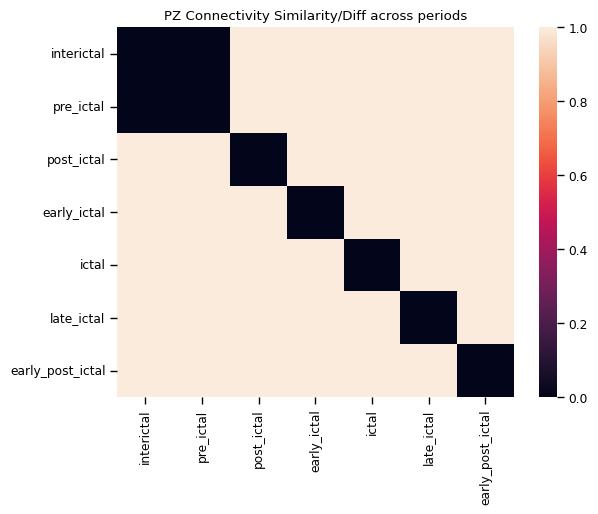

In [48]:
with sns.plotting_context("paper"):
    sns.heatmap(pz_win_df)
    plt.title("PZ Connectivity Similarity/Diff across periods")
    plt.savefig("../viz/interperiod_PZ_self_similarity.pdf",transparent=True)

In [11]:
reg_sig_df = []
for period, sig_mat in regional_sig_diff.items():
    df = pd.DataFrame(data=sig_mat,columns=reg_keys, index=reg_keys)
    df['period'] = period
    reg_sig_df.append(df)
reg_sig_df = pd.concat(reg_sig_df)
reg_sig_df

,soz,nz,pz,period
soz,1.000000,0.000100,0.059094,late_ictal
nz,0.000100,1.000000,0.000100,late_ictal
pz,0.060794,0.000100,1.000000,late_ictal
soz,1.000000,0.000100,0.000300,interictal
nz,0.000100,1.000000,0.000100,interictal
pz,0.000300,0.000100,1.000000,interictal
soz,1.000000,0.000100,0.000100,early_ictal
nz,0.000100,1.000000,0.000100,early_ictal
pz,0.000100,0.000100,1.000000,early_ictal
soz,1.000000,0.000800,0.008299,post_ictal


### Holm Bon Correction

In [20]:
reg_sig_df

,soz,nz,pz,period
soz,1.000000,0.000100,0.059094,late_ictal
nz,0.000100,1.000000,0.000100,late_ictal
pz,0.060794,0.000100,1.000000,late_ictal
soz,1.000000,0.000100,0.000300,interictal
nz,0.000100,1.000000,0.000100,interictal
pz,0.000300,0.000100,1.000000,interictal
soz,1.000000,0.000100,0.000100,early_ictal
nz,0.000100,1.000000,0.000100,early_ictal
pz,0.000100,0.000100,1.000000,early_ictal
soz,1.000000,0.000800,0.008299,post_ictal


In [27]:
p_val_df = reg_sig_df.melt(id_vars =['period'], value_vars=['soz','nz','pz'], value_name='p_val')
p_val_df = p_val_df[p_val_df.p_val < 1]
p_val_df = p_val_df.sort_values(by=['p_val'])
m = p_val_df.shape[0]
p_val_df['k'] = np.arange(1,m+1)
p_val_df['bon_holm'] = .05/(m +1 - p_val_df.k)
p_val_df['sig'] = p_val_df.p_val < p_val_df.bon_holm
p_val_df

,period,variable,p_val,k,bon_holm,sig
1,late_ictal,soz,0.000100,1,0.001667,True
4,interictal,soz,0.000100,2,0.001724,True
8,early_ictal,soz,0.000100,3,0.001786,True
7,early_ictal,soz,0.000100,4,0.001852,True
18,interictal,nz,0.000100,5,0.001923,True
17,late_ictal,nz,0.000100,6,0.002000,True
15,late_ictal,nz,0.000100,7,0.002083,True
13,pre_ictal,soz,0.000100,8,0.002174,True
21,early_ictal,nz,0.000100,9,0.002273,True
20,interictal,nz,0.000100,10,0.002381,True


In [47]:
## after bon-holm cutoff p_val is .0125
#* p < .0125
#** p < .001
#*** p< .0001
def star_val(p,cutoff=.0125):
    if p < .0125:
        if p < .0001:
            return 3
        if p < .001:
            return 2
        return  1
    return 0
p_val_df['stars'] = p_val_df.p_val.apply(star_val)
p_val_df.head(2)

,period,variable,p_val,k,bon_holm,sig,stars
1,late_ictal,soz,0.0001,1,0.001667,True,3
4,interictal,soz,0.0001,2,0.001724,True,3


In [ ]:
star_sig = np.zeros((3,3))


array([[0., 3., 0.],
       [3., 0., 3.],
       [0., 3., 0.]])

In [ ]:
reg_sig_df[reg_sig_df.period =='interictal'][['soz','nz','pz']]
corrected_sig_df = []
for period, sig_mat in regional_sig_diff.items():
    star_sig = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            star_sig[i,j] = star_val(sig_mat[i,j])

    df = pd.DataFrame(data=star_sig,columns=reg_keys, index=reg_keys)
    df.apply(star_val)
    df['period'] = period
    corrected_sig_df.append(df)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

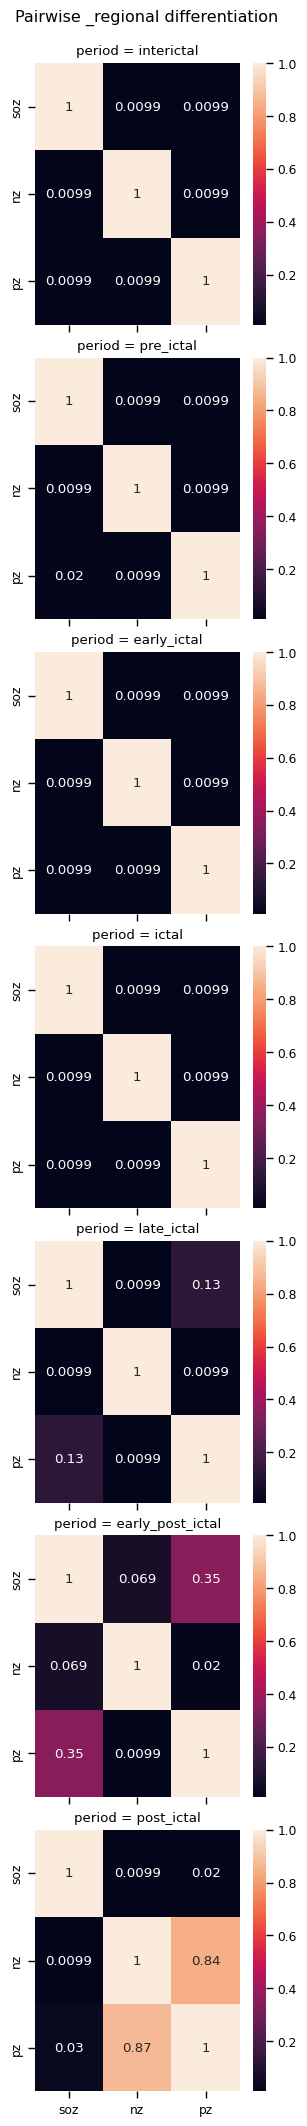

In [45]:
with sns.plotting_context("paper"):
        plot_df = reg_sig_df
        grid = sns.FacetGrid(plot_df, row='period',
                             row_order=['interictal', 'pre_ictal','early_ictal','ictal','late_ictal','early_post_ictal','post_ictal']
        )
        def draw_heatmap(*args, **kwargs):
                data = kwargs.pop("data")
                sns.heatmap(data.drop('period',axis=1),annot=True)
        ax = grid.map_dataframe(draw_heatmap)
        grid.add_legend()
        grid.figure.suptitle("Pairwise _regional differentiation ",y=1.01)
        plt.savefig("../viz/peri_regional diff _ttest.pdf", transparent=True)

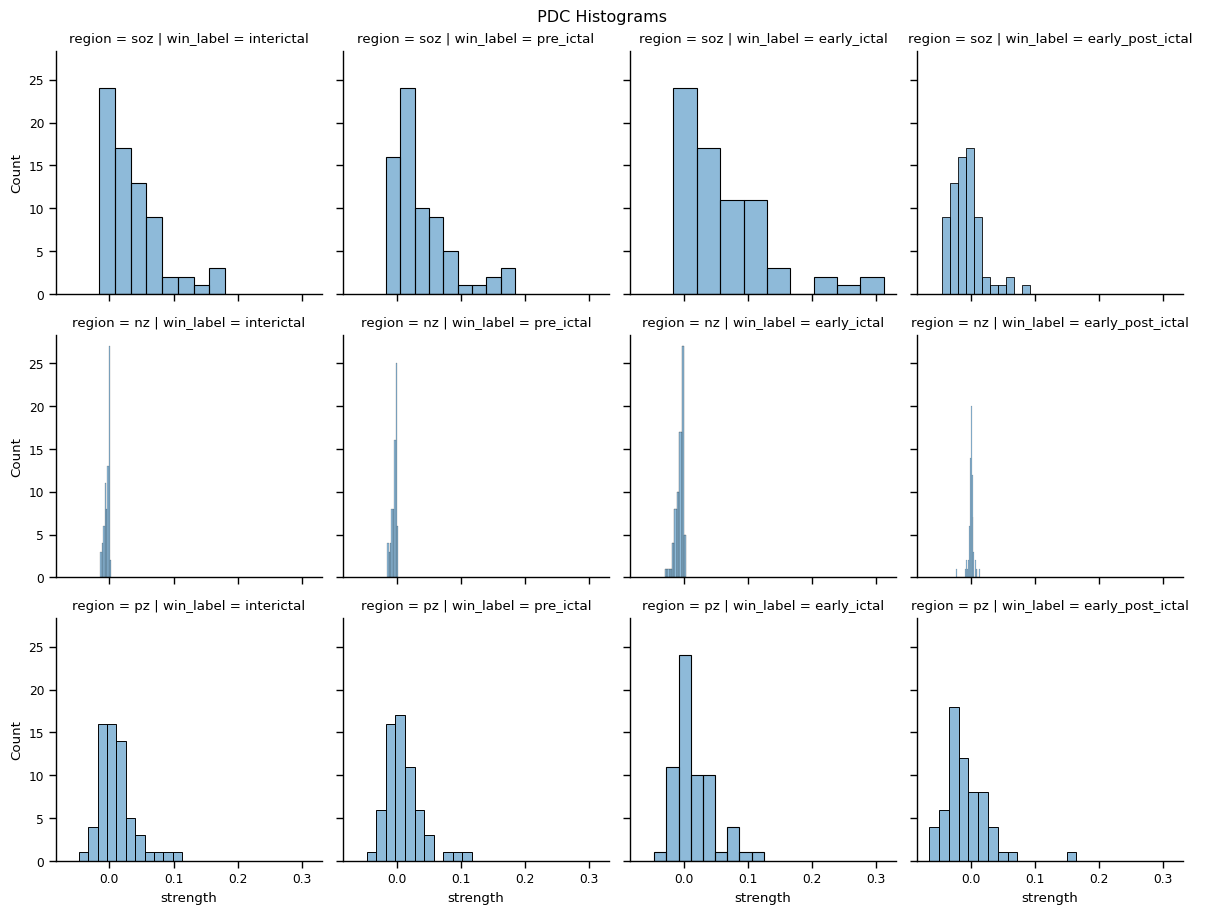

In [29]:
stats_df = window_stats_df[window_stats_df.freq_band =='alpha']
stats_df = stats_df[stats_df.connectivity == 'net_pdc']
with sns.plotting_context("paper"):
        plot_df = stats_df
        grid = sns.FacetGrid(plot_df, row='region',row_order=['soz', 'nz','pz'],col='win_label', col_order=['interictal','pre_ictal','early_ictal', 'early_post_ictal']) 
        ax = grid.map_dataframe(sns.histplot,x='strength', hue='region',)
        grid.add_legend()
        print(f"SOZ SIG matrix values: {soz_sig_matrix}")
        plt.savefig("SOZ pdc dists.pdf", transparent=True)


# Examining Seizure Subtypes

In [44]:
import numpy as np
from scipy import stats
DATA_DIR = "../data/connectivity"

peri_fs = glob.glob(os.path.join(DATA_DIR, "*verbose_centered_*.csv"))
peri_fs

['../data/connectivity/peri_ictal_flow_verbose_centered_Epat21.csv',
 '../data/connectivity/peri_ictal_flow_verbose_centered_Spat48.csv',
 '../data/connectivity/peri_ictal_flow_verbose_centered_Spat05.csv',
 '../data/connectivity/peri_ictal_flow_verbose_centered_Spat12.csv',
 '../data/connectivity/peri_ictal_flow_verbose_centered_Spat10.csv',
 '../data/connectivity/peri_ictal_flow_verbose_centered_Epat11.csv',
 '../data/connectivity/peri_ictal_flow_verbose_centered_Epat38.csv',
 '../data/connectivity/peri_ictal_flow_verbose_centered_Spat11.csv',
 '../data/connectivity/peri_ictal_flow_verbose_centered_Spat22.csv',
 '../data/connectivity/peri_ictal_flow_verbose_centered_Epat25.csv',
 '../data/connectivity/peri_ictal_flow_verbose_centered_Epat23.csv',
 '../data/connectivity/peri_ictal_flow_verbose_centered_Epat06.csv',
 '../data/connectivity/peri_ictal_flow_verbose_centered_Spat27.csv',
 '../data/connectivity/peri_ictal_flow_verbose_centered_Spat39.csv',
 '../data/connectivity/peri_ictal_

In [10]:
grp_cols = ['patID','eventID','sz_type','win_sz_st_end', 'source','freq_band',]
quant_cols = ['in_conn','out_conn','net_conn']

sz_type_dfs = []
for f in peri_fs:
    df = pd.read_csv(f)
    agg_df = df[grp_cols + quant_cols].groupby(grp_cols).mean().reset_index()
    sz_type_dfs.append(agg_df)
sz_type_dfs = pd.concat(sz_type_dfs)

/tmp/ipykernel_1331138/2034182451.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/tmp/ipykernel_1331138/2034182451.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/tmp/ipykernel_1331138/2034182451.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/tmp/ipykernel_1331138/2034182451.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/tmp/ipykernel_1331138/2034182451.py:6: DtypeWarning: Columns (1,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/tmp/ipykernel_1331138/2034182451.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/tmp/ipykernel_1331138/20

In [13]:
sz_type_dfs

,patID,eventID,sz_type,win_sz_st_end,source,freq_band,in_conn,out_conn,net_conn
0,Epat21,1,FIAS,-595.0,nz,alpha,-0.095807,-0.091002,-0.004805
1,Epat21,1,FIAS,-595.0,nz,beta,-0.095830,-0.090118,-0.005712
2,Epat21,1,FIAS,-595.0,nz,delta,-0.078246,-0.077540,-0.000706
3,Epat21,1,FIAS,-595.0,nz,gamma_H,-0.042378,-0.098412,0.056034
4,Epat21,1,FIAS,-595.0,nz,gamma_l,-0.083754,-0.134980,0.051227
...,...,...,...,...,...,...,...,...,...
102392,Epat24,4,"Focal, unknown awareness",623.0,soz,beta,-0.281676,0.093480,-0.375155
102393,Epat24,4,"Focal, unknown awareness",623.0,soz,delta,-0.214142,0.217438,-0.431580
102394,Epat24,4,"Focal, unknown awareness",623.0,soz,gamma_H,-0.402670,0.227024,-0.629693
102395,Epat24,4,"Focal, unknown awareness",623.0,soz,gamma_l,-0.320705,0.157834,-0.478538


In [14]:
grp_cols = ['patID','sz_type','win_sz_st_end', 'source','freq_band']
quant_cols = ['in_conn','out_conn','net_conn']
grp_df = sz_type_dfs[grp_cols+quant_cols].groupby(grp_cols).mean().reset_index()

In [32]:
peri_grp_df = grp_df[grp_df.win_sz_st_end > -30]
peri_grp_df = peri_grp_df[peri_grp_df.win_sz_st_end < 60]
soz_peri_df = peri_grp_df[peri_grp_df.source =='soz']
soz_peri_df = soz_peri_df[soz_peri_df.sz_type.isin(['FBTC', 'FIAS', 'FAS'])]

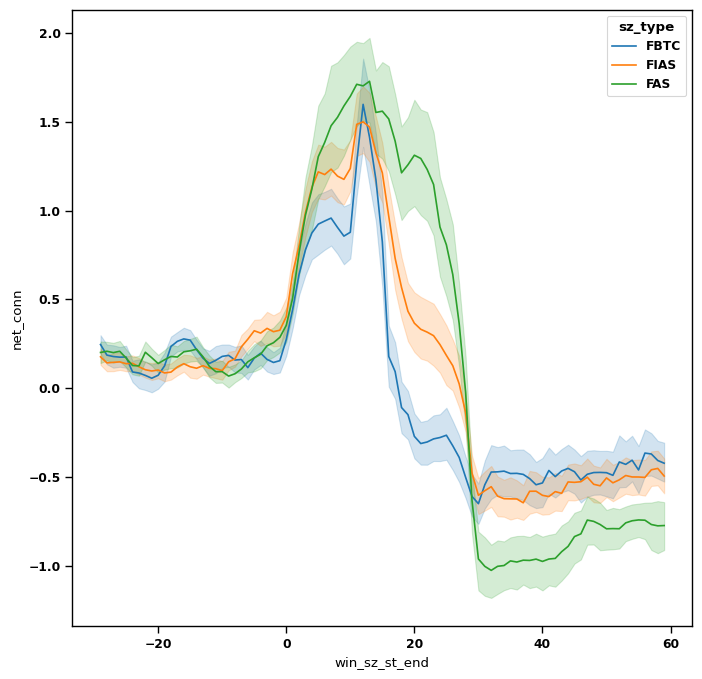

In [33]:
%matplotlib inline
with sns.plotting_context("paper"):
        sns.lineplot(data=soz_peri_df,x='win_sz_st_end',y='net_conn', hue='sz_type')
        plt.show()

In [60]:
import numpy as np
from scipy import stats
stats_df = soz_peri_df[soz_peri_df.win_sz_st_end > 18] 
stats_df = stats_df[stats_df.win_sz_st_end <= 30]
stats_df = stats_df[stats_df.freq_band == 'alpha']
stats_df

,patID,sz_type,win_sz_st_end,source,freq_band,in_conn,out_conn,net_conn
7374,Epat02,FBTC,19.0,soz,alpha,-0.654403,0.012571,-0.666974
7386,Epat02,FBTC,20.0,soz,alpha,-0.791362,0.278453,-1.069815
7398,Epat02,FBTC,21.0,soz,alpha,-0.900519,0.317473,-1.217993
7410,Epat02,FBTC,22.0,soz,alpha,-0.822148,0.294817,-1.116965
7422,Epat02,FBTC,23.0,soz,alpha,-0.977122,0.221966,-1.199089
...,...,...,...,...,...,...,...,...
3541902,pat33,FAS,26.0,soz,alpha,3.307205,-1.072609,4.379815
3541920,pat33,FAS,27.0,soz,alpha,3.159991,-1.011347,4.171338
3541938,pat33,FAS,28.0,soz,alpha,2.558604,-0.879326,3.437929
3541956,pat33,FAS,29.0,soz,alpha,0.425508,-0.287789,0.713297


In [61]:
fas_df

,net_conn
win_sz_st_end,
21.0,1.146162
22.0,1.067745
23.0,0.977120
24.0,0.760354
25.0,0.712089
26.0,0.566135
27.0,0.305525
28.0,-0.039124
29.0,-0.536475


In [62]:
## run stats
fas_df = stats_df[stats_df.sz_type =='FAS']
fas_df = fas_df[['win_sz_st_end','net_conn']].groupby("win_sz_st_end").mean() 


fias_df = stats_df[stats_df.sz_type =='FIAS']
fias_df = fias_df[['win_sz_st_end','net_conn']].groupby("win_sz_st_end").mean() 

fbtc_df = stats_df[stats_df.sz_type =='FBTC']
fbtc_df = fbtc_df[['win_sz_st_end','net_conn']].groupby("win_sz_st_end").mean() 

print(f"FAS vs FIAS: {stats.ttest_ind(fias_df.net_conn, fas_df.net_conn)}")
print(f"FAS vs FBTC: {stats.ttest_ind(fbtc_df.net_conn, fas_df.net_conn)}")
print(f"FBTC vs FIAS: {stats.ttest_ind(fbtc_df.net_conn, fias_df.net_conn)}")

FAS vs FIAS: TtestResult(statistic=np.float64(-2.1548051305229667), pvalue=np.float64(0.04238678146122166), df=np.float64(22.0))
FAS vs FBTC: TtestResult(statistic=np.float64(-4.299065831164452), pvalue=np.float64(0.0002906120614180447), df=np.float64(22.0))
FBTC vs FIAS: TtestResult(statistic=np.float64(-4.328845583985974), pvalue=np.float64(0.0002702145180510157), df=np.float64(22.0))
